# Code for Comparing CNN Models with Transfer Learning

This code is intended to compare several CNN models with transfer learning for solid data with 3 classes: **"high," "medium,"** and **"low"** concentrations of solid.

## Selected Models for Comparison

For a comprehensive comparison, the following models will be used to cover a wide range of architectures:

- **AlexNet** - Basic reference.
- **EfficientNet-B4** - To evaluate modern efficiency and accuracy.
- **MobileNetV2** - To assess performance in lightweight models.
- **SqueezeNet** - Lightweight model.


In [2]:
# Import Packages
import torch
import torchvision
from torchvision import models, transforms
from torchvision.datasets import ImageFolder
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Subset, DataLoader, random_split
import numpy as np
import time
import os
import shutil

In [3]:
# Setting Hyperparameters for Equal Conditions
# Hyperparameters
# Adam Optimizer
lr=0.0005
num_epochs = 50
batch_size = 50

In [4]:
# Transformations to Make Images Suitable for 
# AlexNet, VGG16, ResNet50, DenseNet121, MobileNetV2 
# All require 244x244 pixels
transform = transforms.Compose([
    transforms.Resize(256),  # Resize
    transforms.CenterCrop(244),  # Center crop
    transforms.ToTensor(),  # Convert image from PIL (Python Imaging Library) to a tensor
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])  # Normalization and standardization
])

In [5]:
# Assign a class according to the folder name
# Read images
data = 'C:/Users/Itz/Documents/DOCTORADO/ART-SS-TL-EV/datasets/'               # Dataset path
# Create an ImageFolder for the data
dataset = ImageFolder(root=data, transform=transform)

# Randomly select images,
# get their indices
indices = {label: np.where(np.array(dataset.targets) == label)[0] for label in range(len(dataset.classes))}

# Split the indices for each class into training and testing
train_indices = []
test_indices = []
for label, idx in indices.items():
    np.random.shuffle(idx)
    train_size = int(0.9 * len(idx))
    train_indices.extend(idx[:train_size])
    test_indices.extend(idx[train_size:])

# Create training and testing subsets with the obtained indices
train_data = Subset(dataset, train_indices)
test_data = Subset(dataset, test_indices)

# Create DataLoaders for the training and testing sets
train_loader = DataLoader(train_data, batch_size=50, shuffle=True)
test_loader = DataLoader(test_data, batch_size=50, shuffle=False)  # shuffle is false to maintain the labels of the data

# Check the number of samples in each set
print(f"Number of training samples: {len(train_data)}")
print(f"Number of testing samples: {len(test_data)}")


Number of training samples: 5862
Number of testing samples: 653


In [6]:
# Verifying the detected classes
num_classes = len(dataset.classes)
print("The number of classes is", num_classes)
class_names = dataset.classes  # Verifying the number of classes
print("The classes are:", class_names)  # Verifying the name of each class

The number of classes is 3
The classes are: ['1Alta', '2Media', '3Baja']


In [7]:
# Deleting existing pretrained networks from the system to ensure 
# the network uses the weights obtained from PyTorch (original weights of the network)

# Path to the cache directory
cache_dir = os.path.expanduser('~/.cache/torch/hub/checkpoints')

# Prefix of the cache file name for AlexNet
alexnet_filename_prefix = 'alexnet'

# Remove only AlexNet cache files if they exist
if os.path.exists(cache_dir):
    for filename in os.listdir(cache_dir):
        if alexnet_filename_prefix in filename:
            file_path = os.path.join(cache_dir, filename)
            if os.path.isfile(file_path):
                os.remove(file_path)
                print(f"Cache file removed: {file_path}")
            elif os.path.isdir(file_path):
                shutil.rmtree(file_path)
                print(f"Cache directory removed: {file_path}")
else:
    print(f"Cache directory not found at: {cache_dir}")

# Download pretrained AlexNet model
alexnet_model = models.alexnet(weights=models.AlexNet_Weights.DEFAULT)

# Replacing the final layer with the proposed classification
alexnet_model.classifier[6] = nn.Sequential(
    nn.Linear(alexnet_model.classifier[6].in_features, num_classes)
)

# Display the architecture of the modified model
print(alexnet_model)


Downloading: "https://download.pytorch.org/models/alexnet-owt-7be5be79.pth" to C:\Users\Itz/.cache\torch\hub\checkpoints\alexnet-owt-7be5be79.pth
100%|██████████| 233M/233M [00:41<00:00, 5.83MB/s] 


AlexNet(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace=True)
    (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace=True)
    (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (avgpool): AdaptiveAvgPool2d(output_size=(6, 6))
  (classifier): Sequential(
    (0): Dropout(p=0.5, inplace=False)
    (1): Linear(in_features=9216, out_features=4096, bias=True)
 

In [8]:
# Deleting existing pretrained networks from the system to ensure 
# the network uses the weights obtained from PyTorch (original weights of the network)
# # Path to the cache directory
cache_dir = os.path.expanduser('~/.cache/torch/hub/checkpoints')

# Prefix of the cache file name for MobileNetV2
mobilenetv2_filename_prefix = 'mobilenet_v2'

# Remove only MobileNetV2 cache files if they exist
for filename in os.listdir(cache_dir):
    if filename.startswith(mobilenetv2_filename_prefix):
        file_path = os.path.join(cache_dir, filename)
        if os.path.isfile(file_path):
            os.remove(file_path)
            print(f"Cache file removed: {file_path}")
        elif os.path.isdir(file_path):
            shutil.rmtree(file_path)
            print(f"Cache directory removed: {file_path}")
    else:
        print(f"Cache file for MobileNetV2 not found at: {filename}")

# Download pretrained MobileNetV2 model
mobilenetv2_model = models.mobilenet_v2(weights=models.MobileNet_V2_Weights.DEFAULT)

# Replacing the final layer with the proposed classification
mobilenetv2_model.classifier[1] = nn.Linear(mobilenetv2_model.classifier[1].in_features, num_classes)

# Display the architecture of the modified model
print(mobilenetv2_model)


Cache file for MobileNetV2 not found at: alexnet-owt-7be5be79.pth
Cache file for MobileNetV2 not found at: efficientnet_b0_rwightman-7f5810bc.pth
Cache file removed: C:\Users\Itz/.cache/torch/hub/checkpoints\mobilenet_v2-7ebf99e0.pth
Cache file for MobileNetV2 not found at: squeezenet1_0-b66bff10.pth


Downloading: "https://download.pytorch.org/models/mobilenet_v2-7ebf99e0.pth" to C:\Users\Itz/.cache\torch\hub\checkpoints\mobilenet_v2-7ebf99e0.pth
100%|██████████| 13.6M/13.6M [00:01<00:00, 9.95MB/s]


MobileNetV2(
  (features): Sequential(
    (0): Conv2dNormActivation(
      (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
      (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU6(inplace=True)
    )
    (1): InvertedResidual(
      (conv): Sequential(
        (0): Conv2dNormActivation(
          (0): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=32, bias=False)
          (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
          (2): ReLU6(inplace=True)
        )
        (1): Conv2d(32, 16, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (2): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
    )
    (2): InvertedResidual(
      (conv): Sequential(
        (0): Conv2dNormActivation(
          (0): Conv2d(16, 96, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (1): BatchNorm2d(96, eps=

In [9]:
# Deleting existing pretrained networks from the system to ensure 
# the network uses the weights obtained from PyTorch (original weights of the network)
# Path to the cache directory
cache_dir = os.path.expanduser('~/.cache/torch/hub/checkpoints')

# Prefix of the cache file name for EfficientNet-B0
efficientnet_b0_filename_prefix = 'efficientnet_b0'

# Remove only EfficientNet-B0 cache files if they exist
for filename in os.listdir(cache_dir):
    if filename.startswith(efficientnet_b0_filename_prefix):
        file_path = os.path.join(cache_dir, filename)
        if os.path.isfile(file_path):
            os.remove(file_path)
            print(f"Cache file removed: {file_path}")
        elif os.path.isdir(file_path):
            shutil.rmtree(file_path)
            print(f"Cache directory removed: {file_path}")
    else:
        print(f"Cache file for EfficientNet-B0 not found at: {filename}")

# Download pretrained EfficientNet-B0 model
efficientnet_b0_model = models.efficientnet_b0(weights=models.EfficientNet_B0_Weights.DEFAULT)

# Replacing the final layer with the proposed classification
efficientnet_b0_model.classifier[1] = nn.Linear(efficientnet_b0_model.classifier[1].in_features, num_classes)

# Display the architecture of the modified model
print(efficientnet_b0_model)

Cache file for EfficientNet-B0 not found at: alexnet-owt-7be5be79.pth
Cache file removed: C:\Users\Itz/.cache/torch/hub/checkpoints\efficientnet_b0_rwightman-7f5810bc.pth
Cache file for EfficientNet-B0 not found at: mobilenet_v2-7ebf99e0.pth
Cache file for EfficientNet-B0 not found at: squeezenet1_0-b66bff10.pth


Downloading: "https://download.pytorch.org/models/efficientnet_b0_rwightman-7f5810bc.pth" to C:\Users\Itz/.cache\torch\hub\checkpoints\efficientnet_b0_rwightman-7f5810bc.pth
100%|██████████| 20.5M/20.5M [00:02<00:00, 9.05MB/s]


EfficientNet(
  (features): Sequential(
    (0): Conv2dNormActivation(
      (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
      (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): SiLU(inplace=True)
    )
    (1): Sequential(
      (0): MBConv(
        (block): Sequential(
          (0): Conv2dNormActivation(
            (0): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=32, bias=False)
            (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
            (2): SiLU(inplace=True)
          )
          (1): SqueezeExcitation(
            (avgpool): AdaptiveAvgPool2d(output_size=1)
            (fc1): Conv2d(32, 8, kernel_size=(1, 1), stride=(1, 1))
            (fc2): Conv2d(8, 32, kernel_size=(1, 1), stride=(1, 1))
            (activation): SiLU(inplace=True)
            (scale_activation): Sigmoid()
          )
          (2): Conv2dNormActivat

In [10]:
from torchvision.models import squeezenet1_0, SqueezeNet1_0_Weights
# Deleting existing pretrained networks from the system to ensure 
# the network uses the weights obtained from PyTorch (original weights of the network)
# Path to the cache directory
cache_dir = os.path.expanduser('~/.cache/torch/hub/checkpoints')

# Prefix of the cache file name for SqueezeNet
squeezenet_filename_prefix = 'squeezenet1_0'

# Remove only SqueezeNet cache files if they exist
for filename in os.listdir(cache_dir):
    if filename.startswith(squeezenet_filename_prefix):
        file_path = os.path.join(cache_dir, filename)
        if os.path.isfile(file_path):
            os.remove(file_path)
            print(f"Cache file removed: {file_path}")
        elif os.path.isdir(file_path):
            shutil.rmtree(file_path)
            print(f"Cache directory removed: {file_path}")
    else:
        print(f"Cache file for SqueezeNet not found at: {filename}")

# Download pretrained SqueezeNet1_0 model
squeezenet_model = squeezenet1_0(weights=SqueezeNet1_0_Weights.DEFAULT)

# Replacing the final layer with the proposed classification
# In SqueezeNet, the final layer is `classifier`, which is an `nn.Conv2d`
# We need to change the number of output channels in `classifier` to match `num_classes`
squeezenet_model.classifier[1] = nn.Conv2d(in_channels=512, out_channels=num_classes, kernel_size=(1, 1))

# Display the architecture of the modified model
print(squeezenet_model)


Downloading: "https://download.pytorch.org/models/squeezenet1_0-b66bff10.pth" to C:\Users\Itz/.cache\torch\hub\checkpoints\squeezenet1_0-b66bff10.pth


Cache file for SqueezeNet not found at: alexnet-owt-7be5be79.pth
Cache file for SqueezeNet not found at: efficientnet_b0_rwightman-7f5810bc.pth
Cache file for SqueezeNet not found at: mobilenet_v2-7ebf99e0.pth
Cache file removed: C:\Users\Itz/.cache/torch/hub/checkpoints\squeezenet1_0-b66bff10.pth


100%|██████████| 4.78M/4.78M [00:00<00:00, 8.25MB/s]

SqueezeNet(
  (features): Sequential(
    (0): Conv2d(3, 96, kernel_size=(7, 7), stride=(2, 2))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=True)
    (3): Fire(
      (squeeze): Conv2d(96, 16, kernel_size=(1, 1), stride=(1, 1))
      (squeeze_activation): ReLU(inplace=True)
      (expand1x1): Conv2d(16, 64, kernel_size=(1, 1), stride=(1, 1))
      (expand1x1_activation): ReLU(inplace=True)
      (expand3x3): Conv2d(16, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (expand3x3_activation): ReLU(inplace=True)
    )
    (4): Fire(
      (squeeze): Conv2d(128, 16, kernel_size=(1, 1), stride=(1, 1))
      (squeeze_activation): ReLU(inplace=True)
      (expand1x1): Conv2d(16, 64, kernel_size=(1, 1), stride=(1, 1))
      (expand1x1_activation): ReLU(inplace=True)
      (expand3x3): Conv2d(16, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (expand3x3_activation): ReLU(inplace=True)
    )
    (5): Fire(
   

In [11]:
# Calculate metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt

# Function to calculate metrics
def calculate_metrics(all_labels, all_preds):
    accuracy = accuracy_score(all_labels, all_preds)
    precision = precision_score(all_labels, all_preds, average='weighted')
    recall = recall_score(all_labels, all_preds, average='weighted')
    f1 = f1_score(all_labels, all_preds, average='weighted')
    conf_matrix = confusion_matrix(all_labels, all_preds)
    return accuracy, precision, recall, f1, conf_matrix

# Function to format time
def format_time(seconds):
    hours = int(seconds // 3600)
    minutes = int((seconds % 3600) // 60)
    seconds = int(seconds % 60)
    return f"{hours}h {minutes}m {seconds}s"


## Training and Validation of AlexNet

In [12]:
## Training and Validation of AlexNet
# Parameters
num_epochs = num_epochs
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

# Initialization of the AlexNet model
alexnet_model = alexnet_model.to(device)

# Optimizer and Criterion
optimizer_alexnet = optim.Adam(alexnet_model.parameters(), lr=lr)
criterion = nn.CrossEntropyLoss()

# Metrics history
alexnet_train_acc_history = []
alexnet_val_acc_history = []
alexnet_train_loss_history = []
alexnet_val_loss_history = []

# Measure training time
star_time_alexnet_train = time.time()

# Training the model
for epoch in range(num_epochs):
    alexnet_model.train()
    running_loss = 0.0
    correct_train = 0
    total_train = 0

    all_preds_train_alexnet = []
    all_labels_train_alexnet = []

    for inputs, labels in train_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        optimizer_alexnet.zero_grad()
        outputs = alexnet_model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer_alexnet.step()
        running_loss += loss.item() * inputs.size(0)

        _, predicted = torch.max(outputs, 1)
        total_train += labels.size(0)
        correct_train += (predicted == labels).sum().item()

        # Collect predictions and labels for training phase metrics
        all_preds_train_alexnet.extend(predicted.cpu().numpy())
        all_labels_train_alexnet.extend(labels.cpu().numpy())

    epoch_loss_alexnet = running_loss / len(train_loader.dataset)
    epoch_acc_alexnet = correct_train / total_train
    alexnet_train_loss_history.append(epoch_loss_alexnet)
    alexnet_train_acc_history.append(epoch_acc_alexnet)

    print(f"Epoch [{epoch+1}/{num_epochs}] for AlexNet - Loss: {epoch_loss_alexnet:.4f}, Accuracy: {epoch_acc_alexnet:.4f}")

    # Evaluation on validation set
    alexnet_model.eval()
    running_val_loss = 0.0
    correct_val = 0
    total_val = 0

    all_preds_val_alexnet = []
    all_labels_val_alexnet = []
    all_probs_val_alexnet = []

    with torch.no_grad():
        for inputs, labels in test_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = alexnet_model(inputs)
            probs = torch.softmax(outputs, dim=1)  # Probabilities of each class
            _, predicted = torch.max(outputs, 1)

            all_probs_val_alexnet.extend(probs.cpu().numpy())
            all_preds_val_alexnet.extend(predicted.cpu().numpy())
            all_labels_val_alexnet.extend(labels.cpu().numpy())
            
            loss = criterion(outputs, labels)
            running_val_loss += loss.item() * inputs.size(0)
            total_val += labels.size(0)
            correct_val += (predicted == labels).sum().item()

    epoch_val_loss_alexnet = running_val_loss / len(test_loader.dataset)
    epoch_val_acc_alexnet = correct_val / total_val
    alexnet_val_loss_history.append(epoch_val_loss_alexnet)
    alexnet_val_acc_history.append(epoch_val_acc_alexnet)
    print(f"Validation Loss: {epoch_val_loss_alexnet:.4f}, Validation Accuracy: {epoch_val_acc_alexnet:.4f}")

    # Calculate metrics for validation phase
    accuracy_val_alexnet, precision_val_alexnet, recall_val_alexnet, f1_val_alexnet, _ = calculate_metrics(all_labels_val_alexnet, all_preds_val_alexnet)
    print(f"AlexNet Validation Metrics: Accuracy: {accuracy_val_alexnet:.4f}, Precision: {precision_val_alexnet:.4f}, Recall: {recall_val_alexnet:.4f}, F1-score: {f1_val_alexnet:.4f}")

end_time_alexnet_train = time.time()
# Calculate and display training time:
alexnet_training_time = format_time(end_time_alexnet_train - star_time_alexnet_train)

print(f"Total training time for AlexNet is: {alexnet_training_time}")

alexnet_training_time = end_time_alexnet_train - star_time_alexnet_train
# Save metrics 
alexnet_val_metrics = {
    "Accuracy": accuracy_val_alexnet,
    "Precision": precision_val_alexnet, 
    "Recall": recall_val_alexnet,
    "F1-score": f1_val_alexnet
} 

# Save results for later comparison
alexnet_results = {
    "train_loss": alexnet_train_loss_history,
    "train_acc": alexnet_train_acc_history,
    "val_loss": alexnet_val_loss_history,
    "val_acc": alexnet_val_acc_history,
    "all_preds_val": all_preds_val_alexnet,
    "all_labels_val": all_labels_val_alexnet,
    "all_probs_val": all_probs_val_alexnet
}


Epoch [1/50] for AlexNet - Loss: 0.4792, Accuracy: 0.7839
Validation Loss: 0.4343, Validation Accuracy: 0.7963
AlexNet Validation Metrics: Accuracy: 0.7963, Precision: 0.8762, Recall: 0.7963, F1-score: 0.7889
Epoch [2/50] for AlexNet - Loss: 0.3083, Accuracy: 0.8710
Validation Loss: 0.8172, Validation Accuracy: 0.6432
AlexNet Validation Metrics: Accuracy: 0.6432, Precision: 0.5367, Recall: 0.6432, F1-score: 0.5595


c:\Users\Itz\anaconda3\envs\ANNs_env\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Epoch [3/50] for AlexNet - Loss: 0.5238, Accuracy: 0.7769
Validation Loss: 0.7081, Validation Accuracy: 0.7381
AlexNet Validation Metrics: Accuracy: 0.7381, Precision: 0.7906, Recall: 0.7381, F1-score: 0.7551
Epoch [4/50] for AlexNet - Loss: 0.4680, Accuracy: 0.7965
Validation Loss: 0.2671, Validation Accuracy: 0.9035
AlexNet Validation Metrics: Accuracy: 0.9035, Precision: 0.9001, Recall: 0.9035, F1-score: 0.8973
Epoch [5/50] for AlexNet - Loss: 0.3519, Accuracy: 0.8504
Validation Loss: 0.2997, Validation Accuracy: 0.8775
AlexNet Validation Metrics: Accuracy: 0.8775, Precision: 0.8940, Recall: 0.8775, F1-score: 0.8591
Epoch [6/50] for AlexNet - Loss: 0.3164, Accuracy: 0.8669
Validation Loss: 0.6109, Validation Accuracy: 0.7106
AlexNet Validation Metrics: Accuracy: 0.7106, Precision: 0.8169, Recall: 0.7106, F1-score: 0.7189
Epoch [7/50] for AlexNet - Loss: 0.4012, Accuracy: 0.8357
Validation Loss: 0.2910, Validation Accuracy: 0.8974
AlexNet Validation Metrics: Accuracy: 0.8974, Precisi

c:\Users\Itz\anaconda3\envs\ANNs_env\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Epoch [10/50] for AlexNet - Loss: 0.4970, Accuracy: 0.7791
Validation Loss: 0.4965, Validation Accuracy: 0.7902
AlexNet Validation Metrics: Accuracy: 0.7902, Precision: 0.7376, Recall: 0.7902, F1-score: 0.7466


c:\Users\Itz\anaconda3\envs\ANNs_env\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Epoch [11/50] for AlexNet - Loss: 0.4541, Accuracy: 0.7921
Validation Loss: 0.3396, Validation Accuracy: 0.8913
AlexNet Validation Metrics: Accuracy: 0.8913, Precision: 0.8905, Recall: 0.8913, F1-score: 0.8838
Epoch [12/50] for AlexNet - Loss: 0.3359, Accuracy: 0.8574
Validation Loss: 0.2503, Validation Accuracy: 0.9020
AlexNet Validation Metrics: Accuracy: 0.9020, Precision: 0.9058, Recall: 0.9020, F1-score: 0.8938
Epoch [13/50] for AlexNet - Loss: 0.4462, Accuracy: 0.8292
Validation Loss: 0.4584, Validation Accuracy: 0.7979
AlexNet Validation Metrics: Accuracy: 0.7979, Precision: 0.6931, Recall: 0.7979, F1-score: 0.7417


c:\Users\Itz\anaconda3\envs\ANNs_env\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Epoch [14/50] for AlexNet - Loss: 0.4669, Accuracy: 0.8002
Validation Loss: 0.3735, Validation Accuracy: 0.8331
AlexNet Validation Metrics: Accuracy: 0.8331, Precision: 0.7477, Recall: 0.8331, F1-score: 0.7817


c:\Users\Itz\anaconda3\envs\ANNs_env\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Epoch [15/50] for AlexNet - Loss: 0.3803, Accuracy: 0.8185
Validation Loss: 0.4219, Validation Accuracy: 0.8055
AlexNet Validation Metrics: Accuracy: 0.8055, Precision: 0.7407, Recall: 0.8055, F1-score: 0.7593


c:\Users\Itz\anaconda3\envs\ANNs_env\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Epoch [16/50] for AlexNet - Loss: 0.3740, Accuracy: 0.8163
Validation Loss: 0.3475, Validation Accuracy: 0.8193
AlexNet Validation Metrics: Accuracy: 0.8193, Precision: 0.7178, Recall: 0.8193, F1-score: 0.7643


c:\Users\Itz\anaconda3\envs\ANNs_env\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Epoch [17/50] for AlexNet - Loss: 0.3533, Accuracy: 0.8337
Validation Loss: 0.2402, Validation Accuracy: 0.9081
AlexNet Validation Metrics: Accuracy: 0.9081, Precision: 0.9141, Recall: 0.9081, F1-score: 0.9000
Epoch [18/50] for AlexNet - Loss: 0.3071, Accuracy: 0.8727
Validation Loss: 0.2662, Validation Accuracy: 0.8897
AlexNet Validation Metrics: Accuracy: 0.8897, Precision: 0.9011, Recall: 0.8897, F1-score: 0.8776
Epoch [19/50] for AlexNet - Loss: 0.3331, Accuracy: 0.8562
Validation Loss: 0.2887, Validation Accuracy: 0.8897
AlexNet Validation Metrics: Accuracy: 0.8897, Precision: 0.9066, Recall: 0.8897, F1-score: 0.8861
Epoch [20/50] for AlexNet - Loss: 0.3652, Accuracy: 0.8557
Validation Loss: 0.4562, Validation Accuracy: 0.8025
AlexNet Validation Metrics: Accuracy: 0.8025, Precision: 0.7438, Recall: 0.8025, F1-score: 0.7572


c:\Users\Itz\anaconda3\envs\ANNs_env\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Epoch [21/50] for AlexNet - Loss: 0.3771, Accuracy: 0.8182
Validation Loss: 0.3260, Validation Accuracy: 0.8515
AlexNet Validation Metrics: Accuracy: 0.8515, Precision: 0.7549, Recall: 0.8515, F1-score: 0.7966


c:\Users\Itz\anaconda3\envs\ANNs_env\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Epoch [22/50] for AlexNet - Loss: 0.3469, Accuracy: 0.8342
Validation Loss: 0.3298, Validation Accuracy: 0.8300
AlexNet Validation Metrics: Accuracy: 0.8300, Precision: 0.7297, Recall: 0.8300, F1-score: 0.7751


c:\Users\Itz\anaconda3\envs\ANNs_env\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Epoch [23/50] for AlexNet - Loss: 0.3427, Accuracy: 0.8519
Validation Loss: 0.4906, Validation Accuracy: 0.8637
AlexNet Validation Metrics: Accuracy: 0.8637, Precision: 0.9010, Recall: 0.8637, F1-score: 0.8629
Epoch [24/50] for AlexNet - Loss: 0.3096, Accuracy: 0.8736
Validation Loss: 0.2724, Validation Accuracy: 0.8913
AlexNet Validation Metrics: Accuracy: 0.8913, Precision: 0.9094, Recall: 0.8913, F1-score: 0.8730
Epoch [25/50] for AlexNet - Loss: 0.3118, Accuracy: 0.8709
Validation Loss: 0.2841, Validation Accuracy: 0.8744
AlexNet Validation Metrics: Accuracy: 0.8744, Precision: 0.8849, Recall: 0.8744, F1-score: 0.8620
Epoch [26/50] for AlexNet - Loss: 0.3458, Accuracy: 0.8356
Validation Loss: 0.3229, Validation Accuracy: 0.8545
AlexNet Validation Metrics: Accuracy: 0.8545, Precision: 0.7585, Recall: 0.8545, F1-score: 0.7997


c:\Users\Itz\anaconda3\envs\ANNs_env\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Epoch [27/50] for AlexNet - Loss: 0.3458, Accuracy: 0.8265
Validation Loss: 0.3412, Validation Accuracy: 0.8147
AlexNet Validation Metrics: Accuracy: 0.8147, Precision: 0.7128, Recall: 0.8147, F1-score: 0.7596


c:\Users\Itz\anaconda3\envs\ANNs_env\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Epoch [28/50] for AlexNet - Loss: 0.3417, Accuracy: 0.8576
Validation Loss: 0.3140, Validation Accuracy: 0.8484
AlexNet Validation Metrics: Accuracy: 0.8484, Precision: 0.8631, Recall: 0.8484, F1-score: 0.8285
Epoch [29/50] for AlexNet - Loss: 0.3182, Accuracy: 0.8639
Validation Loss: 0.3520, Validation Accuracy: 0.8576
AlexNet Validation Metrics: Accuracy: 0.8576, Precision: 0.8678, Recall: 0.8576, F1-score: 0.8440
Epoch [30/50] for AlexNet - Loss: 0.2688, Accuracy: 0.8918
Validation Loss: 0.2256, Validation Accuracy: 0.9219
AlexNet Validation Metrics: Accuracy: 0.9219, Precision: 0.9315, Recall: 0.9219, F1-score: 0.9146
Epoch [31/50] for AlexNet - Loss: 0.2512, Accuracy: 0.8949
Validation Loss: 0.2614, Validation Accuracy: 0.8897
AlexNet Validation Metrics: Accuracy: 0.8897, Precision: 0.9117, Recall: 0.8897, F1-score: 0.8868
Epoch [32/50] for AlexNet - Loss: 0.2658, Accuracy: 0.8872
Validation Loss: 0.2667, Validation Accuracy: 0.8882
AlexNet Validation Metrics: Accuracy: 0.8882, Pr

c:\Users\Itz\anaconda3\envs\ANNs_env\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Epoch [35/50] for AlexNet - Loss: 0.3016, Accuracy: 0.8695
Validation Loss: 0.3096, Validation Accuracy: 0.9035
AlexNet Validation Metrics: Accuracy: 0.9035, Precision: 0.9226, Recall: 0.9035, F1-score: 0.8897
Epoch [36/50] for AlexNet - Loss: 0.4675, Accuracy: 0.7890
Validation Loss: 0.3577, Validation Accuracy: 0.8116
AlexNet Validation Metrics: Accuracy: 0.8116, Precision: 0.7094, Recall: 0.8116, F1-score: 0.7565


c:\Users\Itz\anaconda3\envs\ANNs_env\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Epoch [37/50] for AlexNet - Loss: 0.3668, Accuracy: 0.8248
Validation Loss: 0.2369, Validation Accuracy: 0.9112
AlexNet Validation Metrics: Accuracy: 0.9112, Precision: 0.9081, Recall: 0.9112, F1-score: 0.9075
Epoch [38/50] for AlexNet - Loss: 0.3205, Accuracy: 0.8586
Validation Loss: 0.3060, Validation Accuracy: 0.9142
AlexNet Validation Metrics: Accuracy: 0.9142, Precision: 0.9241, Recall: 0.9142, F1-score: 0.9070
Epoch [39/50] for AlexNet - Loss: 0.2852, Accuracy: 0.8806
Validation Loss: 0.2846, Validation Accuracy: 0.8698
AlexNet Validation Metrics: Accuracy: 0.8698, Precision: 0.8779, Recall: 0.8698, F1-score: 0.8701
Epoch [40/50] for AlexNet - Loss: 0.2886, Accuracy: 0.8821
Validation Loss: 0.2123, Validation Accuracy: 0.9173
AlexNet Validation Metrics: Accuracy: 0.9173, Precision: 0.9320, Recall: 0.9173, F1-score: 0.9102
Epoch [41/50] for AlexNet - Loss: 0.2827, Accuracy: 0.8796
Validation Loss: 0.2537, Validation Accuracy: 0.9219
AlexNet Validation Metrics: Accuracy: 0.9219, Pr

c:\Users\Itz\anaconda3\envs\ANNs_env\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Epoch [43/50] for AlexNet - Loss: 0.3465, Accuracy: 0.8431
Validation Loss: 10.0752, Validation Accuracy: 0.5559
AlexNet Validation Metrics: Accuracy: 0.5559, Precision: 0.4740, Recall: 0.5559, F1-score: 0.4181
Epoch [44/50] for AlexNet - Loss: 0.7582, Accuracy: 0.7165
Validation Loss: 0.3397, Validation Accuracy: 0.8423
AlexNet Validation Metrics: Accuracy: 0.8423, Precision: 0.7442, Recall: 0.8423, F1-score: 0.7875


c:\Users\Itz\anaconda3\envs\ANNs_env\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Epoch [45/50] for AlexNet - Loss: 0.4890, Accuracy: 0.7849
Validation Loss: 0.3455, Validation Accuracy: 0.8469
AlexNet Validation Metrics: Accuracy: 0.8469, Precision: 0.8783, Recall: 0.8469, F1-score: 0.7996
Epoch [46/50] for AlexNet - Loss: 0.3697, Accuracy: 0.8262
Validation Loss: 0.3395, Validation Accuracy: 0.8652
AlexNet Validation Metrics: Accuracy: 0.8652, Precision: 0.8841, Recall: 0.8652, F1-score: 0.8340
Epoch [47/50] for AlexNet - Loss: 0.3226, Accuracy: 0.8605
Validation Loss: 0.2744, Validation Accuracy: 0.9005
AlexNet Validation Metrics: Accuracy: 0.9005, Precision: 0.9052, Recall: 0.9005, F1-score: 0.8926
Epoch [48/50] for AlexNet - Loss: 0.3582, Accuracy: 0.8373
Validation Loss: 0.3551, Validation Accuracy: 0.8515
AlexNet Validation Metrics: Accuracy: 0.8515, Precision: 0.8661, Recall: 0.8515, F1-score: 0.8100
Epoch [49/50] for AlexNet - Loss: 0.3478, Accuracy: 0.8434
Validation Loss: 0.3462, Validation Accuracy: 0.8270
AlexNet Validation Metrics: Accuracy: 0.8270, Pr

c:\Users\Itz\anaconda3\envs\ANNs_env\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Epoch [50/50] for AlexNet - Loss: 0.3415, Accuracy: 0.8315
Validation Loss: 0.3082, Validation Accuracy: 0.8423
AlexNet Validation Metrics: Accuracy: 0.8423, Precision: 0.7442, Recall: 0.8423, F1-score: 0.7875
Total training time for AlexNet is: 0h 49m 28s


c:\Users\Itz\anaconda3\envs\ANNs_env\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


## Training and Validation of MovileNetV2

In [13]:
# # Entrenamiento de MovilNetV2
# Parámetros
num_epochs = num_epochs
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

# Inicialización del modelo MobileNetV2
mobilenetv2_model.to(device)


# Optimizer y Criterion
optimizer_mobilenetv2 = optim.Adam(mobilenetv2_model.parameters(), lr=lr)
criterion = nn.CrossEntropyLoss()

# Historial de métricas
mobilenetv2_train_acc_history = []
mobilenetv2_val_acc_history = []
mobilenetv2_train_loss_history = []
mobilenetv2_val_loss_history = []

# Medir tiempo
start_time_movilnetv2 = time.time()

# Entrenamiento del modelo
for epoch in range(num_epochs):
    mobilenetv2_model.train()
    running_loss = 0.0
    correct_train = 0
    total_train = 0

    all_preds_train_mobilenetv2 = []
    all_labels_train_mobilenetv2 = []

    for inputs, labels in train_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        optimizer_mobilenetv2.zero_grad()
        outputs = mobilenetv2_model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer_mobilenetv2.step()
        running_loss += loss.item() * inputs.size(0)

        _, predicted = torch.max(outputs, 1)
        total_train += labels.size(0)
        correct_train += (predicted == labels).sum().item()

        # Collect predictions and labels for training phase metrics
        all_preds_train_mobilenetv2.extend(predicted.cpu().numpy())
        all_labels_train_mobilenetv2.extend(labels.cpu().numpy())

    epoch_loss_mobilenetv2 = running_loss / len(train_loader.dataset)
    epoch_acc_mobilenetv2 = correct_train / total_train
    mobilenetv2_train_loss_history.append(epoch_loss_mobilenetv2)
    mobilenetv2_train_acc_history.append(epoch_acc_mobilenetv2)

    print(f"Epoch [{epoch+1}/{num_epochs}] for MobileNetV2 - Loss: {epoch_loss_mobilenetv2:.4f}, Accuracy: {epoch_acc_mobilenetv2:.4f}")

    # Evaluación en conjunto de validación
    mobilenetv2_model.eval()
    running_val_loss = 0.0
    correct_val = 0
    total_val = 0

    all_preds_val_mobilenetv2 = []
    all_labels_val_mobilenetv2 = []
    all_probs_val_mobilenetv2 = []

    with torch.no_grad():
        for inputs, labels in test_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = mobilenetv2_model(inputs)
            probs = torch.softmax(outputs, dim=1)  # Probabilidades de cada clase
            _, predicted = torch.max(outputs, 1)
            
            all_probs_val_mobilenetv2.extend(probs.cpu().numpy())
            all_preds_val_mobilenetv2.extend(predicted.cpu().numpy())
            all_labels_val_mobilenetv2.extend(labels.cpu().numpy())
            
            loss = criterion(outputs, labels)
            running_val_loss += loss.item() * inputs.size(0)
            total_val += labels.size(0)
            correct_val += (predicted == labels).sum().item()

    epoch_val_loss_mobilenetv2 = running_val_loss / len(test_loader.dataset)
    epoch_val_acc_mobilenetv2 = correct_val / total_val
    mobilenetv2_val_loss_history.append(epoch_val_loss_mobilenetv2)
    mobilenetv2_val_acc_history.append(epoch_val_acc_mobilenetv2)
    print(f"Validation Loss: {epoch_val_loss_mobilenetv2:.4f}, Validation Accuracy: {epoch_val_acc_mobilenetv2:.4f}")

    # Calcular métricas para fase de validación
    accuracy_val_mobilenetv2, precision_val_mobilenetv2, recall_val_mobilenetv2, f1_val_mobilenetv2, _ = calculate_metrics(all_labels_val_mobilenetv2, all_preds_val_mobilenetv2)
    print(f"MobileNetV2 Validation Metrics: Accuracy: {accuracy_val_mobilenetv2:.4f}, Precision: {precision_val_mobilenetv2:.4f}, Recall: {recall_val_mobilenetv2:.4f}, F1-score: {f1_val_mobilenetv2:.4f}")

end_time_movilnetv2_train = time.time()
# Calcular y mostrar el tiempo de entrenamiento:
movilnetv2_training_time = format_time(end_time_movilnetv2_train - start_time_movilnetv2)

print(f"El tiempo de entrenamiento de MovilNetV2 es de: {movilnetv2_training_time}")

movilnetv2_training_time = end_time_movilnetv2_train - start_time_movilnetv2
#Guadrar Metricas 
movilnetv2_val_metrics = {
    "Accuracy": accuracy_val_mobilenetv2,
    "Precision": precision_val_mobilenetv2, 
    "Recall": recall_val_mobilenetv2,
    "F1-score": f1_val_mobilenetv2 
} 

# Guardar los resultados para comparación posterior
mobilenetv2_results = {
    "train_loss": mobilenetv2_train_loss_history,
    "train_acc": mobilenetv2_train_acc_history,
    "val_loss": mobilenetv2_val_loss_history,
    "val_acc": mobilenetv2_val_acc_history,
    "all_preds_val": all_preds_val_mobilenetv2,
    "all_labels_val": all_labels_val_mobilenetv2,
    "all_probs_val": all_probs_val_mobilenetv2
}


Epoch [1/50] for MobileNetV2 - Loss: 0.1535, Accuracy: 0.9483
Validation Loss: 0.0844, Validation Accuracy: 0.9770
MobileNetV2 Validation Metrics: Accuracy: 0.9770, Precision: 0.9780, Recall: 0.9770, F1-score: 0.9765
Epoch [2/50] for MobileNetV2 - Loss: 0.0504, Accuracy: 0.9829
Validation Loss: 0.0322, Validation Accuracy: 0.9923
MobileNetV2 Validation Metrics: Accuracy: 0.9923, Precision: 0.9924, Recall: 0.9923, F1-score: 0.9924
Epoch [3/50] for MobileNetV2 - Loss: 0.0176, Accuracy: 0.9944
Validation Loss: 0.0388, Validation Accuracy: 0.9832
MobileNetV2 Validation Metrics: Accuracy: 0.9832, Precision: 0.9836, Recall: 0.9832, F1-score: 0.9832
Epoch [4/50] for MobileNetV2 - Loss: 0.0191, Accuracy: 0.9937
Validation Loss: 0.0094, Validation Accuracy: 0.9969
MobileNetV2 Validation Metrics: Accuracy: 0.9969, Precision: 0.9970, Recall: 0.9969, F1-score: 0.9969
Epoch [5/50] for MobileNetV2 - Loss: 0.0098, Accuracy: 0.9978
Validation Loss: 0.0732, Validation Accuracy: 0.9770
MobileNetV2 Valid

## Training and Validation of EfficientNet-B0

In [14]:
# Training of EfficientNet-B0
# Parameters
num_epochs = num_epochs
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

# Initialization of the EfficientNet-B0 model
efficientnet_b0_model.to(device)

# Optimizer and Criterion
optimizer_efficientnet_b0 = optim.Adam(efficientnet_b0_model.parameters(), lr=lr)
criterion = nn.CrossEntropyLoss()

# Metrics history
efficientnet_b0_train_acc_history = []
efficientnet_b0_val_acc_history = []
efficientnet_b0_train_loss_history = []
efficientnet_b0_val_loss_history = []

# Measure training time
start_time_efficientnetb0 = time.time()

# Training the model
for epoch in range(num_epochs):
    efficientnet_b0_model.train()
    running_loss = 0.0
    correct_train = 0
    total_train = 0

    all_preds_train_efficientnet_b0 = []
    all_labels_train_efficientnet_b0 = []

    for inputs, labels in train_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        optimizer_efficientnet_b0.zero_grad()
        outputs = efficientnet_b0_model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer_efficientnet_b0.step()
        running_loss += loss.item() * inputs.size(0)

        _, predicted = torch.max(outputs, 1)
        total_train += labels.size(0)
        correct_train += (predicted == labels).sum().item()

        # Collect predictions and labels for training phase metrics
        all_preds_train_efficientnet_b0.extend(predicted.cpu().numpy())
        all_labels_train_efficientnet_b0.extend(labels.cpu().numpy())

    epoch_loss_efficientnet_b0 = running_loss / len(train_loader.dataset)
    epoch_acc_efficientnet_b0 = correct_train / total_train
    efficientnet_b0_train_loss_history.append(epoch_loss_efficientnet_b0)
    efficientnet_b0_train_acc_history.append(epoch_acc_efficientnet_b0)

    print(f"Epoch [{epoch+1}/{num_epochs}] for EfficientNet-B0 - Loss: {epoch_loss_efficientnet_b0:.4f}, Accuracy: {epoch_acc_efficientnet_b0:.4f}")

    # Evaluation on validation set
    efficientnet_b0_model.eval()
    running_val_loss = 0.0
    correct_val = 0
    total_val = 0

    all_preds_val_efficientnet_b0 = []
    all_labels_val_efficientnet_b0 = []
    all_probs_val_efficientnet_b0 = []

    with torch.no_grad():
        for inputs, labels in test_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = efficientnet_b0_model(inputs)
            probs = torch.softmax(outputs, dim=1)  # Probabilities of each class
            _, predicted = torch.max(outputs, 1)
            
            all_probs_val_efficientnet_b0.extend(probs.cpu().numpy())
            all_preds_val_efficientnet_b0.extend(predicted.cpu().numpy())
            all_labels_val_efficientnet_b0.extend(labels.cpu().numpy())
            
            loss = criterion(outputs, labels)
            running_val_loss += loss.item() * inputs.size(0)
            total_val += labels.size(0)
            correct_val += (predicted == labels).sum().item()

    epoch_val_loss_efficientnet_b0 = running_val_loss / len(test_loader.dataset)
    epoch_val_acc_efficientnet_b0 = correct_val / total_val
    efficientnet_b0_val_loss_history.append(epoch_val_loss_efficientnet_b0)
    efficientnet_b0_val_acc_history.append(epoch_val_acc_efficientnet_b0)
    print(f"Validation Loss: {epoch_val_loss_efficientnet_b0:.4f}, Validation Accuracy: {epoch_val_acc_efficientnet_b0:.4f}")

    # Calculate metrics for validation phase
    accuracy_val_efficientnet_b0, precision_val_efficientnet_b0, recall_val_efficientnet_b0, f1_val_efficientnet_b0, _ = calculate_metrics(all_labels_val_efficientnet_b0, all_preds_val_efficientnet_b0)
    print(f"EfficientNet-B0 Validation Metrics: Accuracy: {accuracy_val_efficientnet_b0:.4f}, Precision: {precision_val_efficientnet_b0:.4f}, Recall: {recall_val_efficientnet_b0:.4f}, F1-score: {f1_val_efficientnet_b0:.4f}")

# Stopping the timer
end_time_efficientnetb0_train = time.time()

# Calculate training time
efficientnetb0_training_time = format_time(end_time_efficientnetb0_train - start_time_efficientnetb0)

# Displaying the time 
print(f"The training time for EfficientNet-B0 is: {efficientnetb0_training_time}")

efficientnetb0_training_time = end_time_efficientnetb0_train - start_time_efficientnetb0

# Save metrics 
efficientnet_b0_val_metrics = {
    "Accuracy": accuracy_val_efficientnet_b0,
    "Precision": precision_val_efficientnet_b0, 
    "Recall": recall_val_efficientnet_b0,
    "F1-score": f1_val_efficientnet_b0 
} 

# Save results for later comparison
efficientnet_b0_results = {
    "train_loss": efficientnet_b0_train_loss_history,
    "train_acc": efficientnet_b0_train_acc_history,
    "val_loss": efficientnet_b0_val_loss_history,
    "val_acc": efficientnet_b0_val_acc_history,
    "all_preds_val": all_preds_val_efficientnet_b0,
    "all_labels_val": all_labels_val_efficientnet_b0,
    "all_probs_val": all_probs_val_efficientnet_b0
}


Epoch [1/50] for EfficientNet-B0 - Loss: 0.1305, Accuracy: 0.9553
Validation Loss: 0.0670, Validation Accuracy: 0.9801
EfficientNet-B0 Validation Metrics: Accuracy: 0.9801, Precision: 0.9807, Recall: 0.9801, F1-score: 0.9802
Epoch [2/50] for EfficientNet-B0 - Loss: 0.0352, Accuracy: 0.9881
Validation Loss: 0.0123, Validation Accuracy: 0.9969
EfficientNet-B0 Validation Metrics: Accuracy: 0.9969, Precision: 0.9969, Recall: 0.9969, F1-score: 0.9969
Epoch [3/50] for EfficientNet-B0 - Loss: 0.0570, Accuracy: 0.9835
Validation Loss: 0.3059, Validation Accuracy: 0.9296
EfficientNet-B0 Validation Metrics: Accuracy: 0.9296, Precision: 0.9365, Recall: 0.9296, F1-score: 0.9273
Epoch [4/50] for EfficientNet-B0 - Loss: 0.0123, Accuracy: 0.9966
Validation Loss: 0.0080, Validation Accuracy: 0.9939
EfficientNet-B0 Validation Metrics: Accuracy: 0.9939, Precision: 0.9939, Recall: 0.9939, F1-score: 0.9939
Epoch [5/50] for EfficientNet-B0 - Loss: 0.0079, Accuracy: 0.9966
Validation Loss: 0.0038, Validatio

## Training and Validation of SqueezeNet

In [15]:
# Training of SqueezeNet
# Parameters
num_epochs = num_epochs
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

# Initialization of the SqueezeNet model
squeezenet_model = squeezenet_model.to(device)

# Optimizer and Criterion
optimizer_squeezenet = optim.Adam(squeezenet_model.parameters(), lr=lr)
criterion = nn.CrossEntropyLoss()

# Metrics history
squeezenet_train_acc_history = []
squeezenet_val_acc_history = []
squeezenet_train_loss_history = []
squeezenet_val_loss_history = []

# Measure training time
start_time_squeezenet = time.time()

# Training the model
for epoch in range(num_epochs):
    squeezenet_model.train()
    running_loss = 0.0
    correct_train = 0
    total_train = 0

    all_preds_train_squeezenet = []
    all_labels_train_squeezenet = []

    for inputs, labels in train_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        optimizer_squeezenet.zero_grad()
        outputs = squeezenet_model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer_squeezenet.step()
        running_loss += loss.item() * inputs.size(0)

        _, predicted = torch.max(outputs, 1)
        total_train += labels.size(0)
        correct_train += (predicted == labels).sum().item()

        # Collect predictions and labels for training phase metrics
        all_preds_train_squeezenet.extend(predicted.cpu().numpy())
        all_labels_train_squeezenet.extend(labels.cpu().numpy())

    epoch_loss_squeezenet = running_loss / len(train_loader.dataset)
    epoch_acc_squeezenet = correct_train / total_train
    squeezenet_train_loss_history.append(epoch_loss_squeezenet)
    squeezenet_train_acc_history.append(epoch_acc_squeezenet)

    print(f"Epoch [{epoch+1}/{num_epochs}] for SqueezeNet - Loss: {epoch_loss_squeezenet:.4f}, Accuracy: {epoch_acc_squeezenet:.4f}")

    # Evaluation on validation set
    squeezenet_model.eval()
    running_val_loss = 0.0
    correct_val = 0
    total_val = 0

    all_preds_val_squeezenet = []
    all_labels_val_squeezenet = []
    all_probs_val_squeezenet = []

    with torch.no_grad():
        for inputs, labels in test_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = squeezenet_model(inputs)
            probs = torch.softmax(outputs, dim=1)  # Probabilities of each class
            _, predicted = torch.max(outputs, 1)
            
            all_probs_val_squeezenet.extend(probs.cpu().numpy())
            all_preds_val_squeezenet.extend(predicted.cpu().numpy())
            all_labels_val_squeezenet.extend(labels.cpu().numpy())
            
            loss = criterion(outputs, labels)
            running_val_loss += loss.item() * inputs.size(0)
            total_val += labels.size(0)
            correct_val += (predicted == labels).sum().item()

    epoch_val_loss_squeezenet = running_val_loss / len(test_loader.dataset)
    epoch_val_acc_squeezenet = correct_val / total_val
    squeezenet_val_loss_history.append(epoch_val_loss_squeezenet)
    squeezenet_val_acc_history.append(epoch_val_acc_squeezenet)
    print(f"Validation Loss: {epoch_val_loss_squeezenet:.4f}, Validation Accuracy: {epoch_val_acc_squeezenet:.4f}")

    # Calculate metrics for validation phase
    accuracy_val_squeezenet, precision_val_squeezenet, recall_val_squeezenet, f1_val_squeezenet, _ = calculate_metrics(all_labels_val_squeezenet, all_preds_val_squeezenet)
    print(f"SqueezeNet Validation Metrics: Accuracy: {accuracy_val_squeezenet:.4f}, Precision: {precision_val_squeezenet:.4f}, Recall: {recall_val_squeezenet:.4f}, F1-score: {f1_val_squeezenet:.4f}")

# Stop the training timer
end_time_squeezenet = time.time()

# Calculate training time
squeezenet_training_time = format_time(end_time_squeezenet - start_time_squeezenet)

# Display training time
print(f"The training time for SqueezeNet is: {squeezenet_training_time}")

squeezenet_training_time = end_time_squeezenet - start_time_squeezenet

# Save metrics
squeezenet_val_metrics = {
    "Accuracy": accuracy_val_squeezenet,
    "Precision": precision_val_squeezenet,
    "Recall": recall_val_squeezenet,
    "F1-score": f1_val_squeezenet
}

# Save results for later comparison
squeezenet_results = {
    "train_loss": squeezenet_train_loss_history,
    "train_acc": squeezenet_train_acc_history,
    "val_loss": squeezenet_val_loss_history,
    "val_acc": squeezenet_val_acc_history,
    "all_preds_val": all_preds_val_squeezenet,
    "all_labels_val": all_labels_val_squeezenet,
    "all_probs_val": all_probs_val_squeezenet
}


Epoch [1/50] for SqueezeNet - Loss: 0.4072, Accuracy: 0.8335
Validation Loss: 0.2021, Validation Accuracy: 0.9372
SqueezeNet Validation Metrics: Accuracy: 0.9372, Precision: 0.9437, Recall: 0.9372, F1-score: 0.9353
Epoch [2/50] for SqueezeNet - Loss: 0.1782, Accuracy: 0.9330
Validation Loss: 0.0877, Validation Accuracy: 0.9632
SqueezeNet Validation Metrics: Accuracy: 0.9632, Precision: 0.9639, Recall: 0.9632, F1-score: 0.9625
Epoch [3/50] for SqueezeNet - Loss: 0.1179, Accuracy: 0.9553
Validation Loss: 0.1254, Validation Accuracy: 0.9403
SqueezeNet Validation Metrics: Accuracy: 0.9403, Precision: 0.9476, Recall: 0.9403, F1-score: 0.9411
Epoch [4/50] for SqueezeNet - Loss: 0.1012, Accuracy: 0.9638
Validation Loss: 0.0563, Validation Accuracy: 0.9786
SqueezeNet Validation Metrics: Accuracy: 0.9786, Precision: 0.9793, Recall: 0.9786, F1-score: 0.9784
Epoch [5/50] for SqueezeNet - Loss: 0.0728, Accuracy: 0.9759
Validation Loss: 0.0389, Validation Accuracy: 0.9908
SqueezeNet Validation Metr

## Trainig and Validation: Accuracy and Loss learning curves

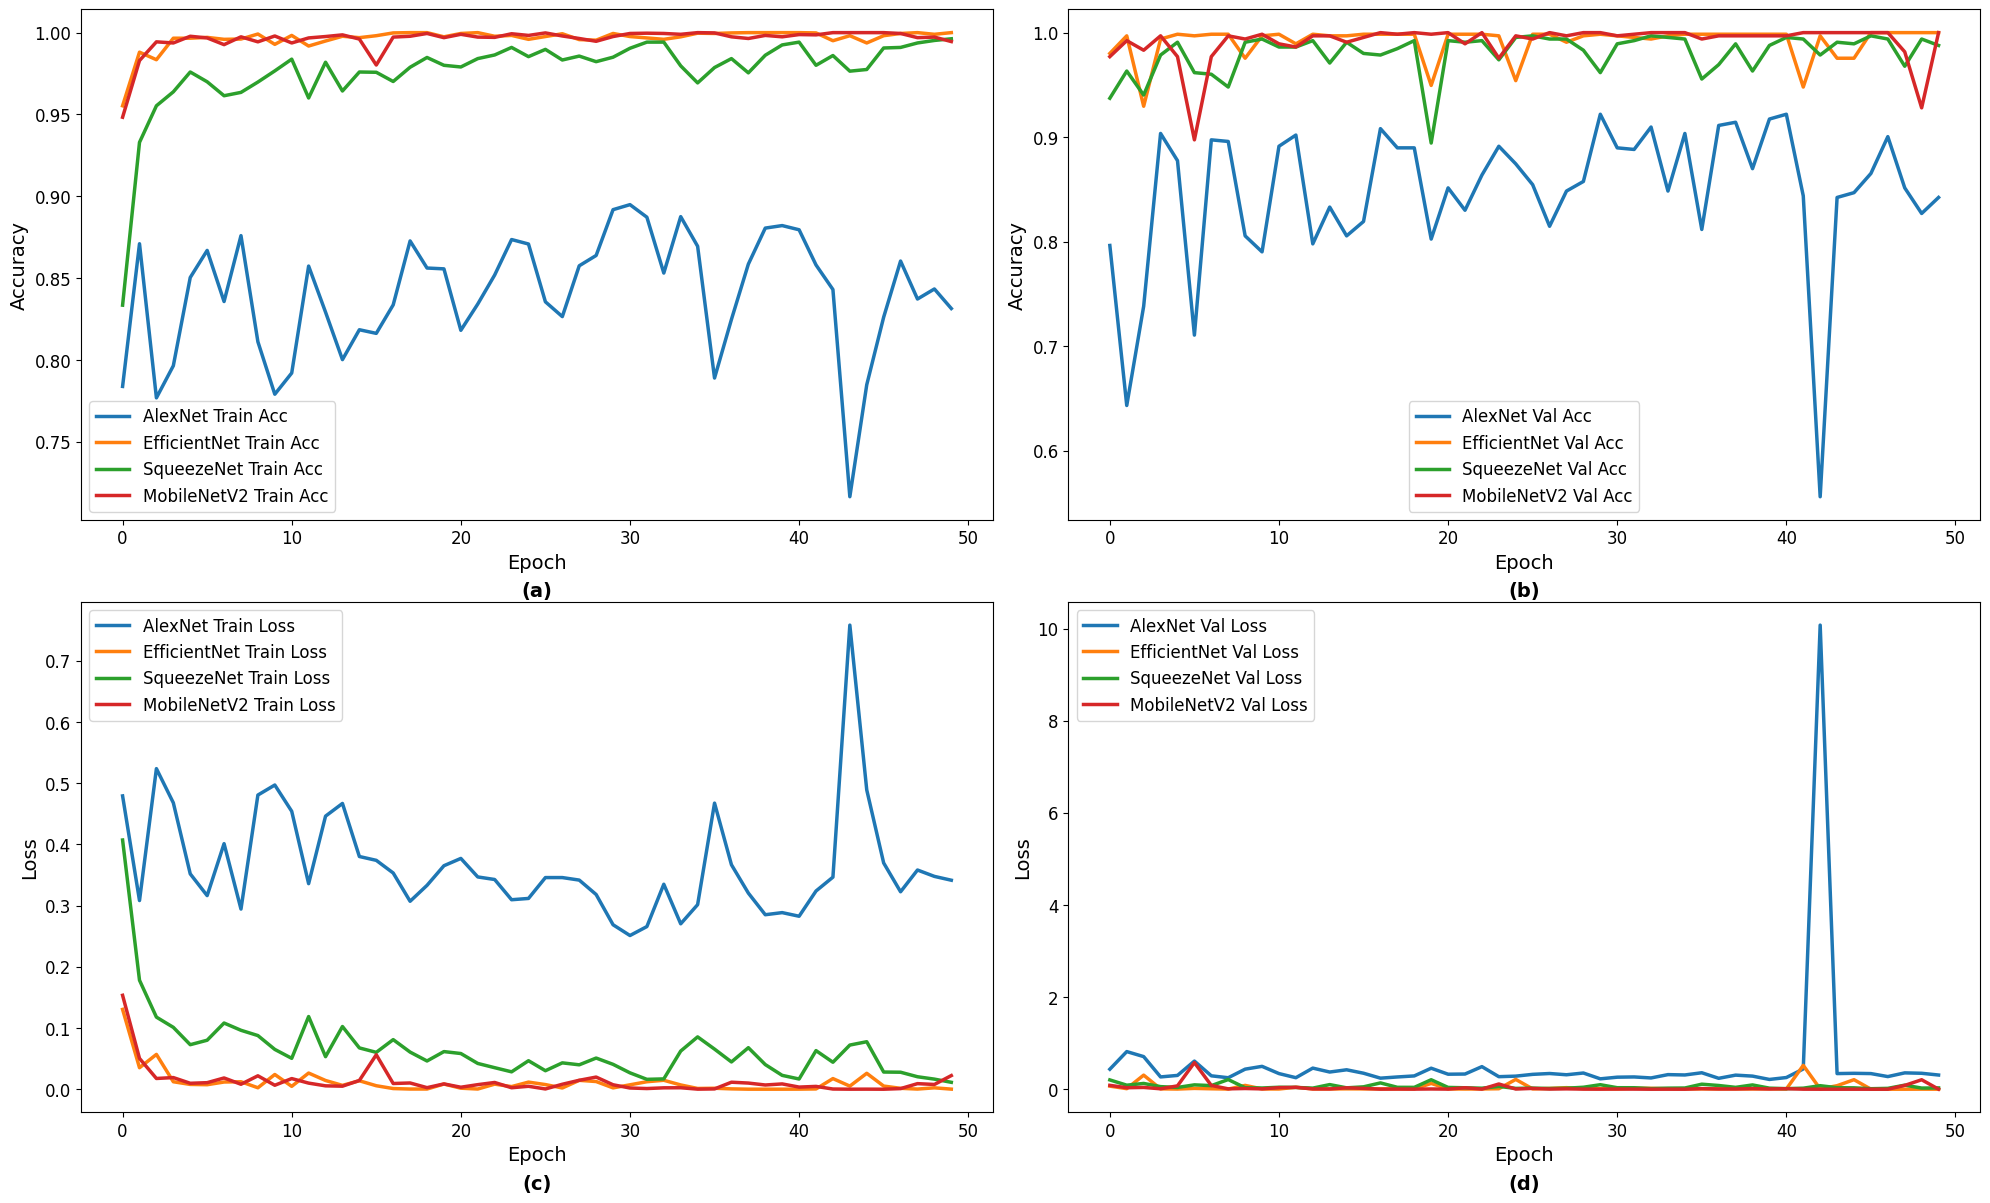

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import roc_curve, auc, confusion_matrix

# Font size
fontsize_title = 16
fontsize_labels = 14
fontsize_ticks = 12
fontsize_legend = 12
fontsize_letter = 14  # Font size for the letters (a), (b), (c), (d)

# Line width
line_width = 2.5  # Adjust the line thickness here

# Plotting learning curves
plt.figure(figsize=(20, 12))

# Plot 1: Training Accuracy
ax1 = plt.subplot(2, 2, 1)
ax1.plot(alexnet_results["train_acc"], label='AlexNet Train Acc', linewidth=line_width)
ax1.plot(efficientnet_b0_results["train_acc"], label='EfficientNet Train Acc', linewidth=line_width)
ax1.plot(squeezenet_results["train_acc"], label='SqueezeNet Train Acc', linewidth=line_width)
ax1.plot(mobilenetv2_results["train_acc"], label='MobileNetV2 Train Acc', linewidth=line_width)
ax1.set_title('', fontsize=fontsize_title)
ax1.set_xlabel('Epoch', fontsize=fontsize_labels)
ax1.set_ylabel('Accuracy', fontsize=fontsize_labels)
ax1.tick_params(axis='both', which='major', labelsize=fontsize_ticks)
ax1.legend(fontsize=fontsize_legend)
# Add letter (a) below the x-axis label
ax1.text(0.5, -0.15, '(a)', transform=ax1.transAxes, fontsize=fontsize_letter, fontweight='bold', ha='center')

# Plot 2: Validation Accuracy
ax2 = plt.subplot(2, 2, 2)
ax2.plot(alexnet_results["val_acc"], label='AlexNet Val Acc', linewidth=line_width)
ax2.plot(efficientnet_b0_results["val_acc"], label='EfficientNet Val Acc', linewidth=line_width)
ax2.plot(squeezenet_results["val_acc"], label='SqueezeNet Val Acc', linewidth=line_width)
ax2.plot(mobilenetv2_results["val_acc"], label='MobileNetV2 Val Acc', linewidth=line_width)
ax2.set_title('', fontsize=fontsize_title)
ax2.set_xlabel('Epoch', fontsize=fontsize_labels)
ax2.set_ylabel('Accuracy', fontsize=fontsize_labels)
ax2.tick_params(axis='both', which='major', labelsize=fontsize_ticks)
ax2.legend(fontsize=fontsize_legend)
# Add letter (b) below the x-axis label
ax2.text(0.5, -0.15, '(b)', transform=ax2.transAxes, fontsize=fontsize_letter, fontweight='bold', ha='center')

# Plot 3: Training Loss
ax3 = plt.subplot(2, 2, 3)
ax3.plot(alexnet_results["train_loss"], label='AlexNet Train Loss', linewidth=line_width)
ax3.plot(efficientnet_b0_results["train_loss"], label='EfficientNet Train Loss', linewidth=line_width)
ax3.plot(squeezenet_results["train_loss"], label='SqueezeNet Train Loss', linewidth=line_width)
ax3.plot(mobilenetv2_results["train_loss"], label='MobileNetV2 Train Loss', linewidth=line_width)
ax3.set_title('', fontsize=fontsize_title)
ax3.set_xlabel('Epoch', fontsize=fontsize_labels)
ax3.set_ylabel('Loss', fontsize=fontsize_labels)
ax3.tick_params(axis='both', which='major', labelsize=fontsize_ticks)
ax3.legend(fontsize=fontsize_legend)
# Add letter (c) below the x-axis label
ax3.text(0.5, -0.15, '(c)', transform=ax3.transAxes, fontsize=fontsize_letter, fontweight='bold', ha='center')

# Plot 4: Validation Loss
ax4 = plt.subplot(2, 2, 4)
ax4.plot(alexnet_results["val_loss"], label='AlexNet Val Loss', linewidth=line_width)
ax4.plot(efficientnet_b0_results["val_loss"], label='EfficientNet Val Loss', linewidth=line_width)
ax4.plot(squeezenet_results["val_loss"], label='SqueezeNet Val Loss', linewidth=line_width)
ax4.plot(mobilenetv2_results["val_loss"], label='MobileNetV2 Val Loss', linewidth=line_width)
ax4.set_title('', fontsize=fontsize_title)
ax4.set_xlabel('Epoch', fontsize=fontsize_labels)
ax4.set_ylabel('Loss', fontsize=fontsize_labels)
ax4.tick_params(axis='both', which='major', labelsize=fontsize_ticks)
ax4.legend(fontsize=fontsize_legend)
# Add letter (d) below the x-axis label
ax4.text(0.5, -0.15, '(d)', transform=ax4.transAxes, fontsize=fontsize_letter, fontweight='bold', ha='center')

plt.tight_layout()  # Adjust the spacing between subplots
plt.show()

## Learning Validation Curves

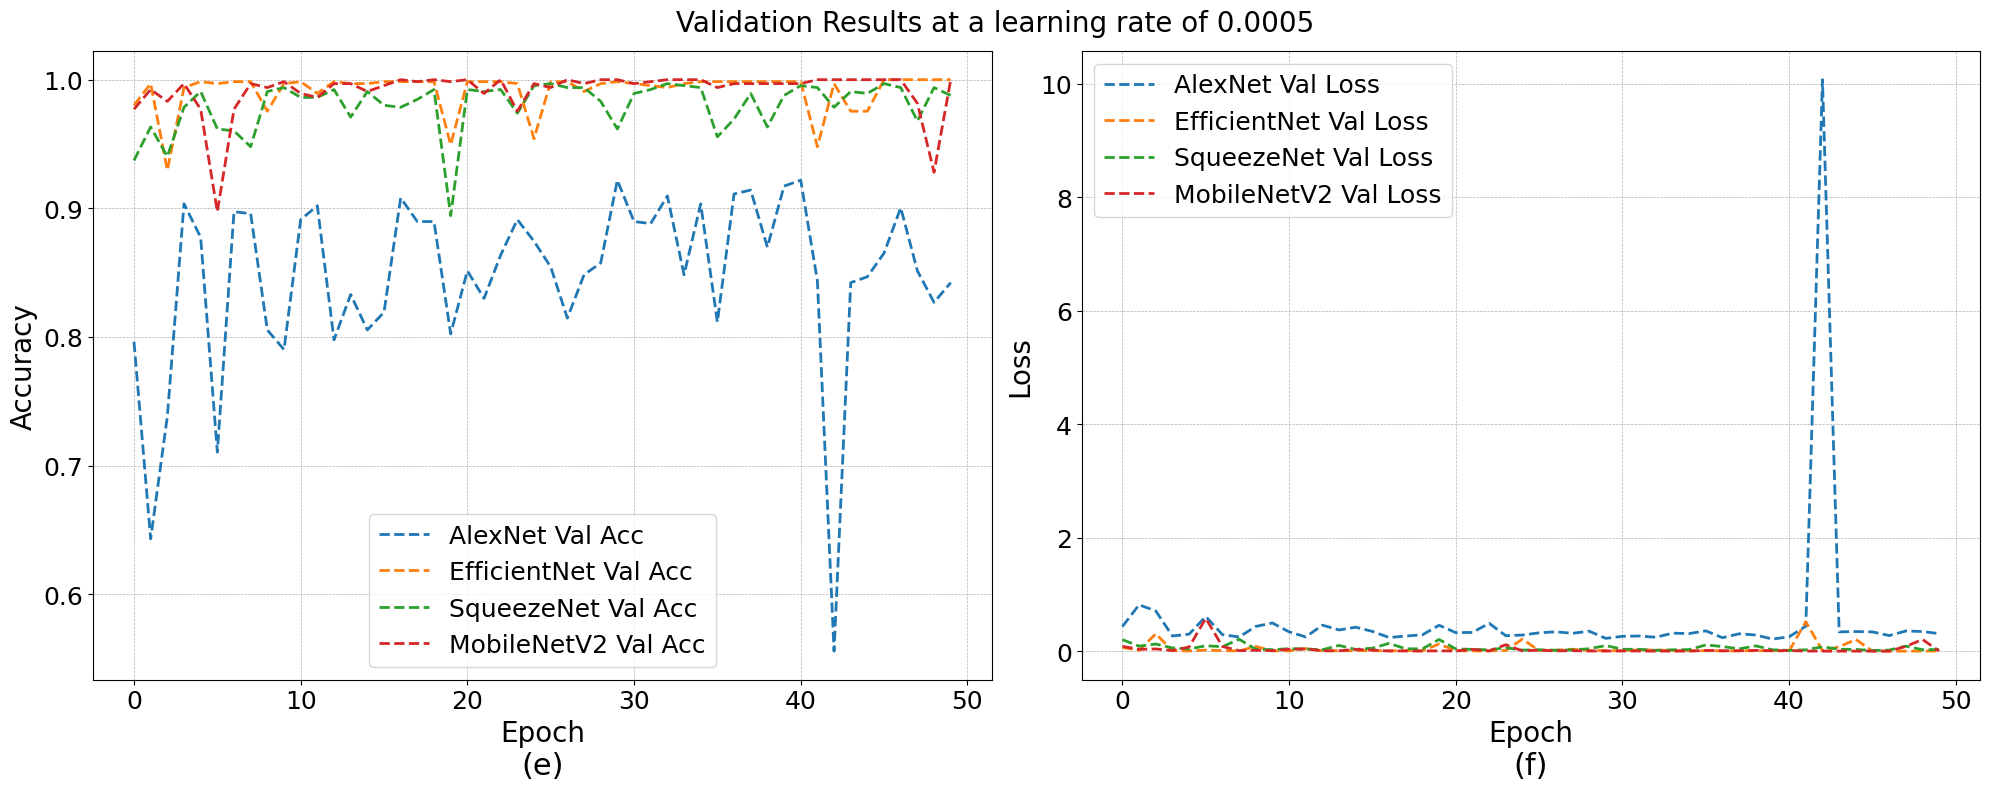

In [17]:
# Font size
fontsize_title = 20
fontsize_labels = 20
fontsize_ticks = 18
fontsize_legend = 18
fontsize_letter = 22  # Font size for the letters (a), (b), (c), (d)

# Line width
line_width = 2  # Adjust the line thickness here

# Plotting learning curves
plt.figure(figsize=(20, 8))

# Plot 1:  Validation Accuracy
ax1 = plt.subplot(1, 2, 1)
ax1.plot(alexnet_results["val_acc"], label='AlexNet Val Acc', linestyle='--', linewidth=line_width)
ax1.plot(efficientnet_b0_results["val_acc"], label='EfficientNet Val Acc', linestyle='--', linewidth=line_width)
ax1.plot(squeezenet_results["val_acc"], label='SqueezeNet Val Acc', linestyle='--', linewidth=line_width)
ax1.plot(mobilenetv2_results["val_acc"], label='MobileNetV2 Val Acc', linestyle='--', linewidth=line_width)
ax1.set_title('', fontsize=fontsize_title)
ax1.set_xlabel('Epoch', fontsize=fontsize_labels)
ax1.set_ylabel('Accuracy', fontsize=fontsize_labels)
ax1.tick_params(axis='both', which='major', labelsize=fontsize_ticks)
ax1.legend(fontsize=fontsize_legend)
ax1.grid(True, axis='both', which='major', linestyle='--', linewidth=0.5)
# Add letter (a) below the x-axis label
ax1.text(0.5, -0.15, '(e)', transform=ax1.transAxes, fontsize=fontsize_letter, ha='center')

# Plot 2: Validation Loss
ax2 = plt.subplot(1, 2, 2)
ax2.plot(alexnet_results["val_loss"], label='AlexNet Val Loss', linestyle='--', linewidth=line_width)
ax2.plot(efficientnet_b0_results["val_loss"], label='EfficientNet Val Loss', linestyle='--', linewidth=line_width)
ax2.plot(squeezenet_results["val_loss"], label='SqueezeNet Val Loss', linestyle='--', linewidth=line_width)
ax2.plot(mobilenetv2_results["val_loss"], label='MobileNetV2 Val Loss', linestyle='--', linewidth=line_width)
ax2.set_title('', fontsize=fontsize_title)
ax2.set_xlabel('Epoch', fontsize=fontsize_labels)
ax2.set_ylabel('Loss', fontsize=fontsize_labels)
ax2.tick_params(axis='both', which='major', labelsize=fontsize_ticks)
ax2.legend(fontsize=fontsize_legend)
ax2.grid(True, axis='both', which='major', linestyle='--', linewidth=0.5)
# Add letter (b) below the x-axis label
ax2.text(0.5, -0.15, '(f)', transform=ax2.transAxes, fontsize=fontsize_letter, ha='center')

plt.suptitle('Validation Results at a learning rate of 0.0005', fontsize=fontsize_title)
plt.tight_layout()  # Adjust the spacing between subplots
plt.savefig('AC-0.0005.png', dpi=600, bbox_inches='tight')  # Save with 600 DPI
plt.show()


## Learning Training Curves

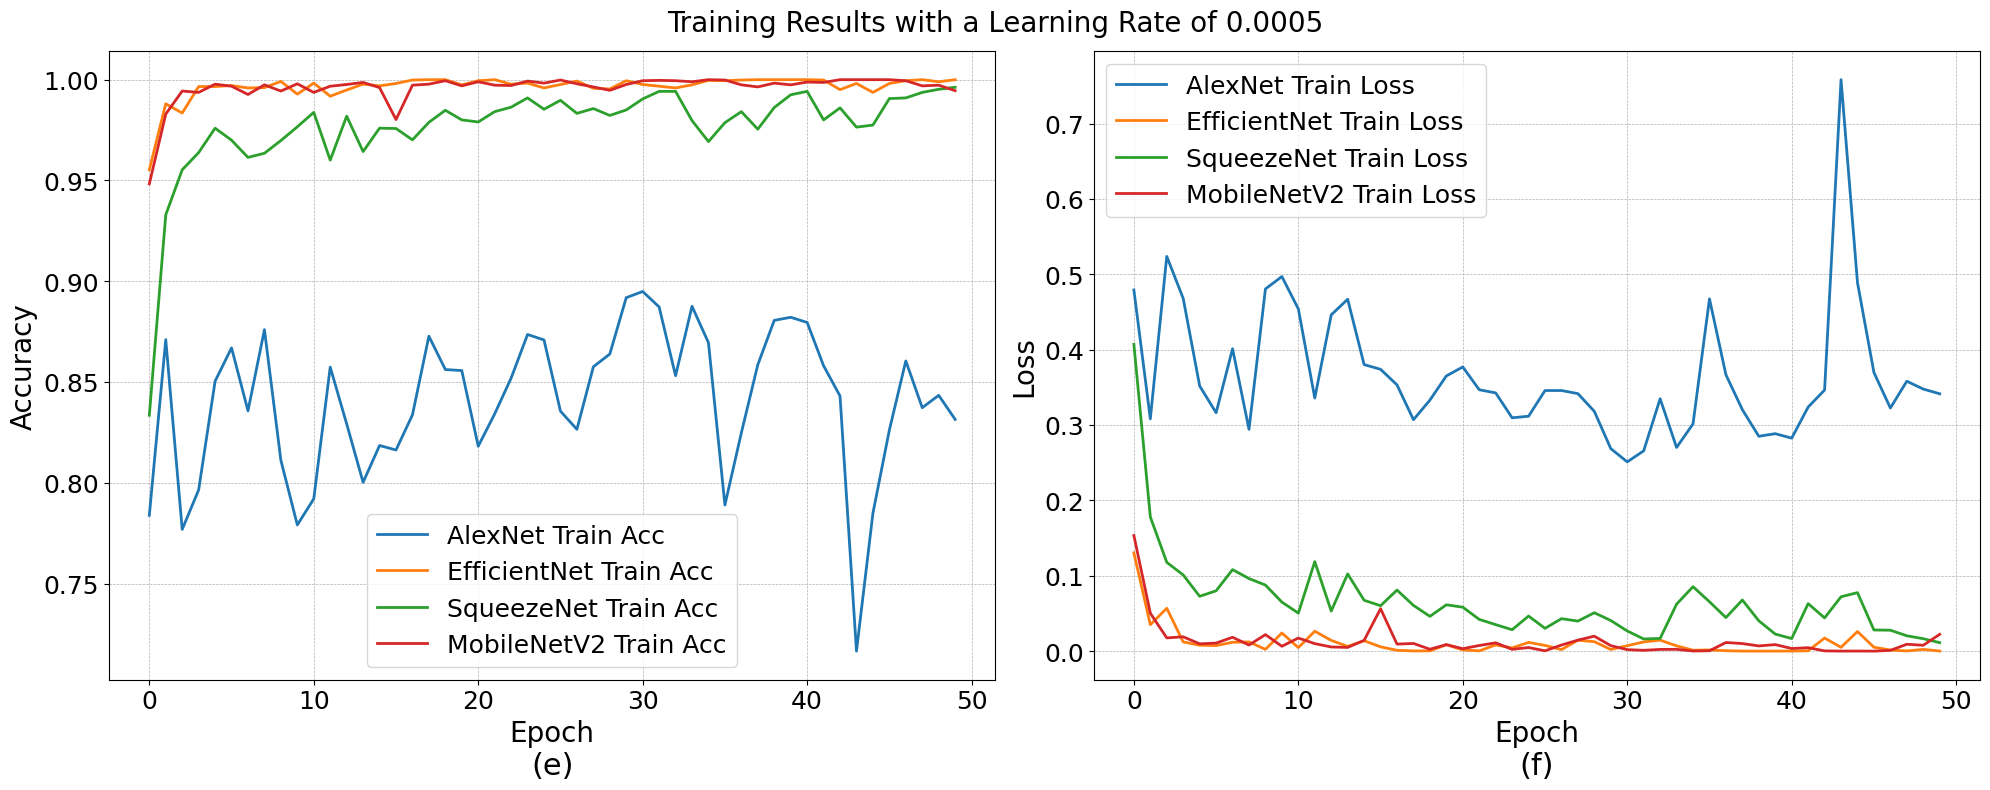

In [18]:

# Font size
fontsize_title = 20
fontsize_labels = 20
fontsize_ticks = 18
fontsize_legend = 18
fontsize_letter = 22  # Font size for the letters (a), (b), (c), (d)

# Line width
line_width = 2  # Adjust the line thickness here

# Plotting learning curves
plt.figure(figsize=(20, 8))

# Plot 1: Training and Validation Accuracy
ax1 = plt.subplot(1, 2, 1)
ax1.plot(alexnet_results["train_acc"], label='AlexNet Train Acc', linewidth=line_width)
ax1.plot(efficientnet_b0_results["train_acc"], label='EfficientNet Train Acc', linewidth=line_width)
ax1.plot(squeezenet_results["train_acc"], label='SqueezeNet Train Acc', linewidth=line_width)
ax1.plot(mobilenetv2_results["train_acc"], label='MobileNetV2 Train Acc', linewidth=line_width)
ax1.set_title('', fontsize=fontsize_title)
ax1.set_xlabel('Epoch', fontsize=fontsize_labels)
ax1.set_ylabel('Accuracy', fontsize=fontsize_labels)
ax1.tick_params(axis='both', which='major', labelsize=fontsize_ticks)
ax1.legend(fontsize=fontsize_legend)
ax1.grid(True, axis='both', which='major', linestyle='--', linewidth=0.5)
# Add letter (a) below the x-axis label
ax1.text(0.5, -0.15, '(e)', transform=ax1.transAxes, fontsize=fontsize_letter, ha='center')

# Plot 2: Training and Validation Loss
ax2 = plt.subplot(1, 2, 2)
ax2.plot(alexnet_results["train_loss"], label='AlexNet Train Loss', linewidth=line_width)
ax2.plot(efficientnet_b0_results["train_loss"], label='EfficientNet Train Loss', linewidth=line_width)
ax2.plot(squeezenet_results["train_loss"], label='SqueezeNet Train Loss', linewidth=line_width)
ax2.plot(mobilenetv2_results["train_loss"], label='MobileNetV2 Train Loss', linewidth=line_width)
ax2.set_title('', fontsize=fontsize_title)
ax2.set_xlabel('Epoch', fontsize=fontsize_labels)
ax2.set_ylabel('Loss', fontsize=fontsize_labels)
ax2.tick_params(axis='both', which='major', labelsize=fontsize_ticks)
ax2.legend(fontsize=fontsize_legend)
ax2.grid(True, axis='both', which='major', linestyle='--', linewidth=0.5)
# Add letter (b) below the x-axis label
ax2.text(0.5, -0.15, '(f)', transform=ax2.transAxes, fontsize=fontsize_letter, ha='center')

plt.suptitle('Training Results with a Learning Rate of 0.0005', fontsize=fontsize_title)
plt.tight_layout()  # Adjust the spacing between subplots
plt.savefig('AC2-0.0005.png', dpi=600, bbox_inches='tight')  # Save with 600 DPI
plt.show()


## Confusion Matrix Comparation

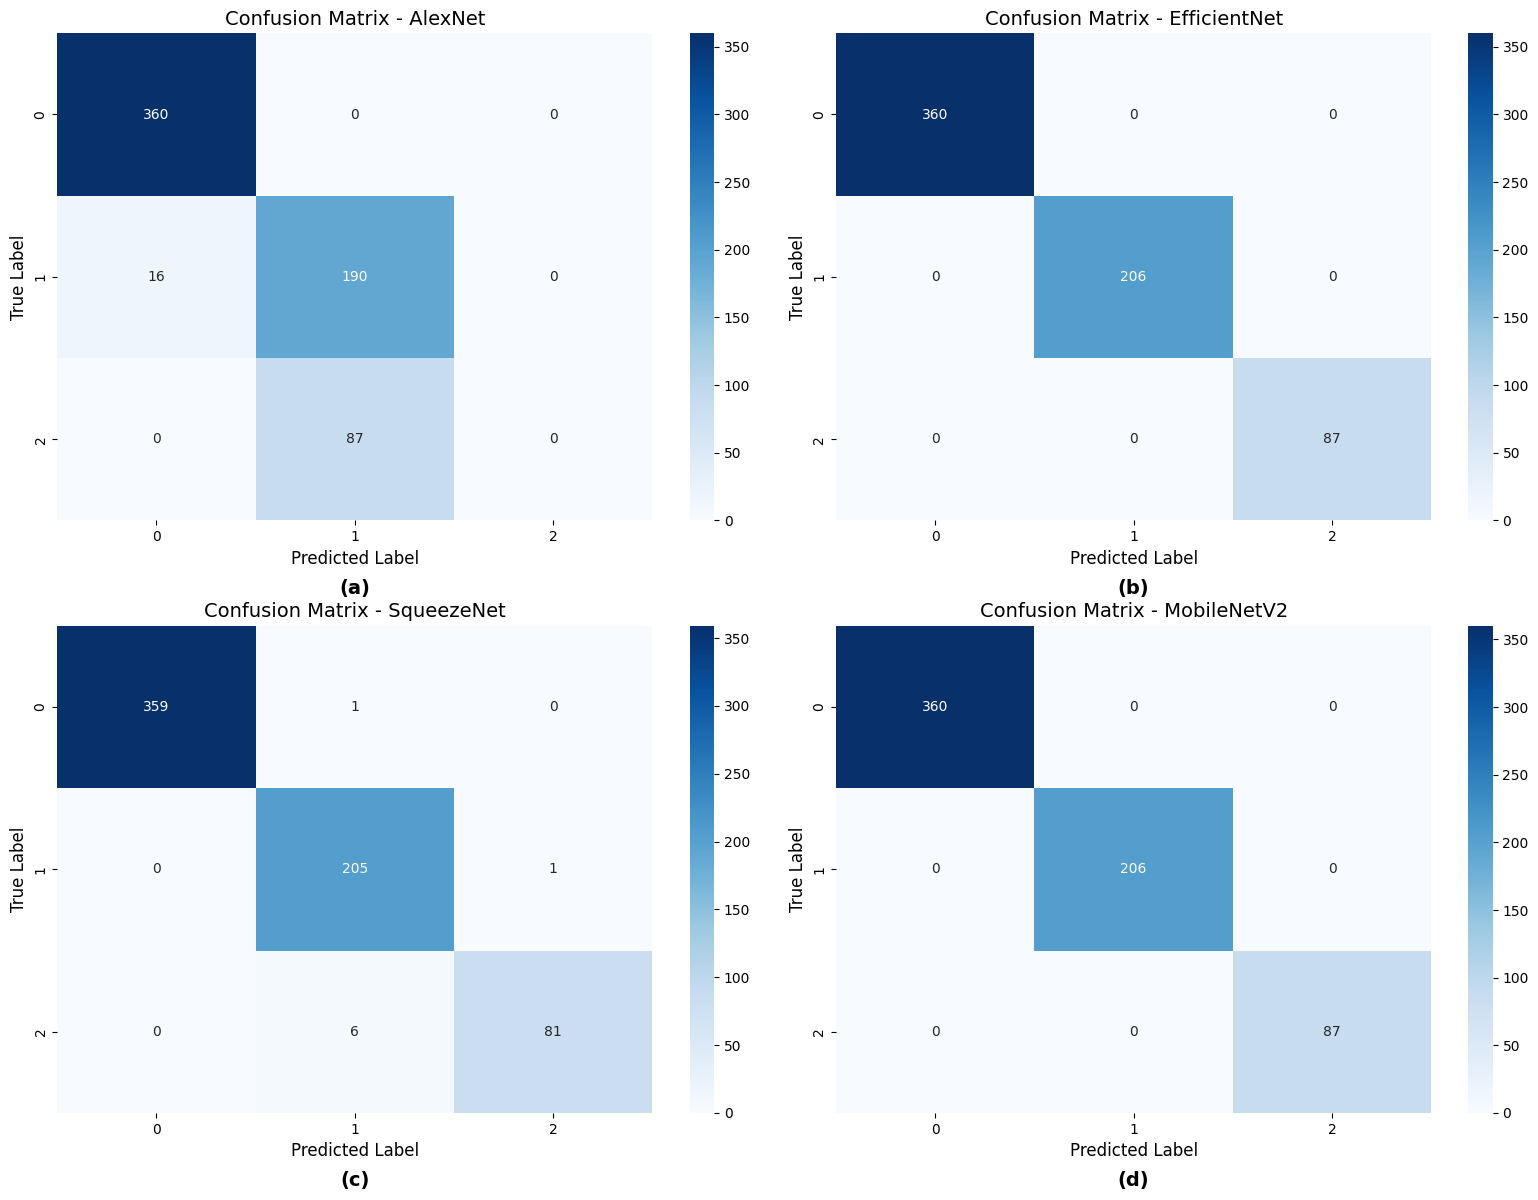

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
import numpy as np

# Confusion matrix with seaborn
def plot_confusion_matrix(ax, conf_matrix, model_name):
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap=plt.cm.Blues, 
                xticklabels=np.arange(conf_matrix.shape[1]),
                yticklabels=np.arange(conf_matrix.shape[0]), ax=ax)
    ax.set_title(f'Confusion Matrix - {model_name}', fontsize=14)
    ax.set_xlabel('Predicted Label', fontsize=12)
    ax.set_ylabel('True Label', fontsize=12)

# Create the figure and axes for subplots
fig, axs = plt.subplots(2, 2, figsize=(16, 12))  # Adjust the size as needed

# Display confusion matrices in subplots
conf_matrix_alexnet = confusion_matrix(alexnet_results["all_labels_val"], alexnet_results["all_preds_val"])
conf_matrix_efficientnet = confusion_matrix(efficientnet_b0_results["all_labels_val"], efficientnet_b0_results["all_preds_val"])
conf_matrix_squeezenet = confusion_matrix(squeezenet_results["all_labels_val"], squeezenet_results["all_preds_val"])
conf_matrix_mobilenetv2 = confusion_matrix(mobilenetv2_results["all_labels_val"], mobilenetv2_results["all_preds_val"])

# Plot each confusion matrix in a different subplot
plot_confusion_matrix(axs[0, 0], conf_matrix_alexnet, "AlexNet")
plot_confusion_matrix(axs[0, 1], conf_matrix_efficientnet, "EfficientNet")
plot_confusion_matrix(axs[1, 0], conf_matrix_squeezenet, "SqueezeNet")
plot_confusion_matrix(axs[1, 1], conf_matrix_mobilenetv2, "MobileNetV2")

# Add letters (a), (b), (c), (d) below the x-axis labels
axs[0, 0].text(0.5, -0.15, '(a)', transform=axs[0, 0].transAxes, fontsize=14, fontweight='bold', ha='center')
axs[0, 1].text(0.5, -0.15, '(b)', transform=axs[0, 1].transAxes, fontsize=14, fontweight='bold', ha='center')
axs[1, 0].text(0.5, -0.15, '(c)', transform=axs[1, 0].transAxes, fontsize=14, fontweight='bold', ha='center')
axs[1, 1].text(0.5, -0.15, '(d)', transform=axs[1, 1].transAxes, fontsize=14, fontweight='bold', ha='center')

# Adjust layout to avoid overlaps
plt.tight_layout()
plt.show()


## ROC Curve comparation

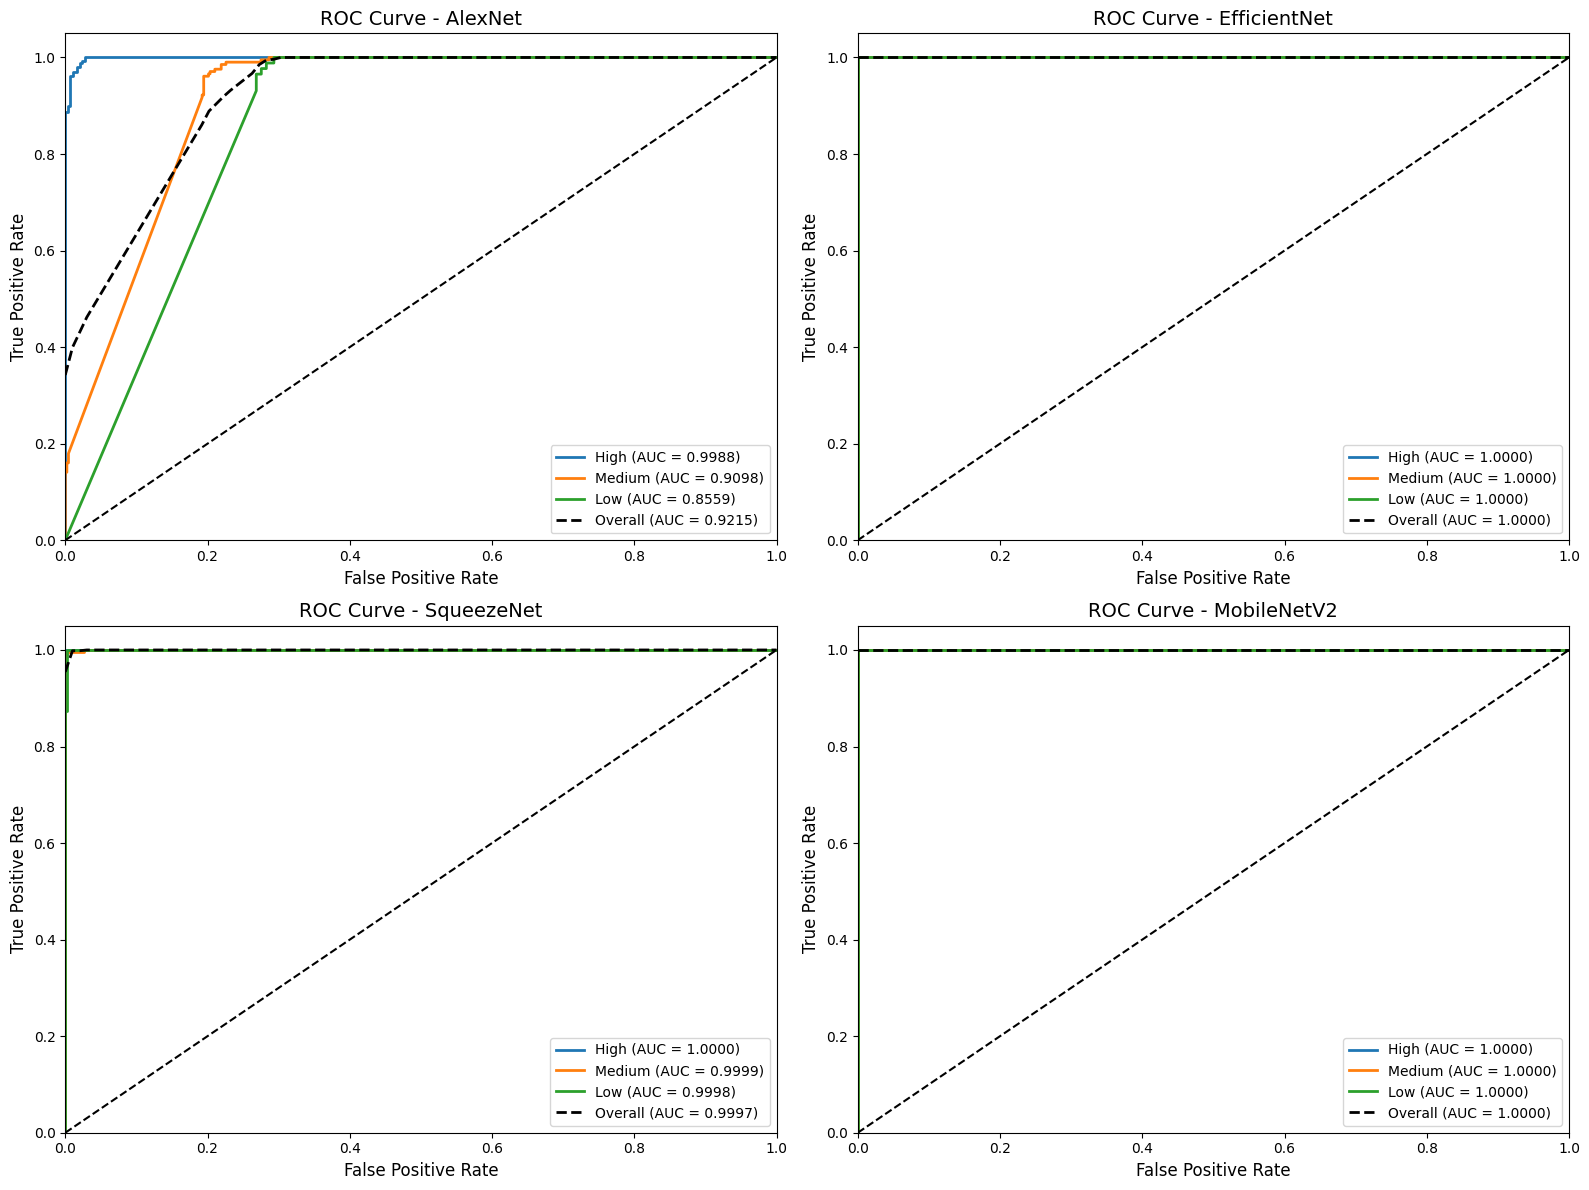

In [20]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
import numpy as np

# ROC Curves
def plot_roc_curve(ax, all_probs, all_labels, model_name, class_names):
    # Binarize the labels
    all_labels_bin = label_binarize(all_labels, classes=range(len(class_names)))
    
    # Initialize lists for ROC curves
    fpr = {}
    tpr = {}
    roc_auc = {}
    
    # Calculate ROC curves for each class
    for i in range(len(class_names)):
        fpr[i], tpr[i], _ = roc_curve(all_labels_bin[:, i], all_probs[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])
    
    # Plot ROC curves for each class
    for i in range(len(class_names)):
        ax.plot(fpr[i], tpr[i], label=f'{class_names[i]} (AUC = {roc_auc[i]:.4f})', linewidth=2)
    
    # Calculate and plot the mean ROC curve
    mean_fpr = np.linspace(0, 1, 100)
    mean_tpr = np.zeros_like(mean_fpr)
    for i in range(len(class_names)):
        mean_tpr += np.interp(mean_fpr, fpr[i], tpr[i])
    mean_tpr /= len(class_names)
    mean_auc = auc(mean_fpr, mean_tpr)
    ax.plot(mean_fpr, mean_tpr, 'k--', label=f'Overall (AUC = {mean_auc:.4f})', linewidth=2)
    
    ax.plot([0, 1], [0, 1], 'k--')
    ax.set_xlim([0.0, 1.0])
    ax.set_ylim([0.0, 1.05])
    ax.set_xlabel('False Positive Rate', fontsize=12)
    ax.set_ylabel('True Positive Rate', fontsize=12)
    ax.set_title(f'ROC Curve - {model_name}', fontsize=14)
    ax.legend(loc='lower right')

# Create the figure and axes for subplots
fig, axs = plt.subplots(2, 2, figsize=(16, 12))  # Adjust the size as needed

# Define class names
class_names = ["High", "Medium", "Low"]

# Data for ROC curves (adjust the number of classes if necessary)
num_classes = len(class_names)

# Data for ROC curves
all_probs_alexnet = np.array(alexnet_results.get("all_probs_val", []))  # Ensure you have probabilities
all_labels_alexnet = np.array(alexnet_results.get("all_labels_val", []))
all_probs_efficientnet = np.array(efficientnet_b0_results.get("all_probs_val", []))
all_labels_efficientnet = np.array(efficientnet_b0_results.get("all_labels_val", []))
all_probs_squeezenet = np.array(squeezenet_results.get("all_probs_val", []))
all_labels_squeezenet = np.array(squeezenet_results.get("all_labels_val", []))
all_probs_mobilenetv2 = np.array(mobilenetv2_results.get("all_probs_val", []))
all_labels_mobilenetv2 = np.array(mobilenetv2_results.get("all_labels_val", []))

# Plot each ROC curve in a different subplot
plot_roc_curve(axs[0, 0], all_probs_alexnet, all_labels_alexnet, "AlexNet", class_names)
plot_roc_curve(axs[0, 1], all_probs_efficientnet, all_labels_efficientnet, "EfficientNet", class_names)
plot_roc_curve(axs[1, 0], all_probs_squeezenet, all_labels_squeezenet, "SqueezeNet", class_names)
plot_roc_curve(axs[1, 1], all_probs_mobilenetv2, all_labels_mobilenetv2, "MobileNetV2", class_names)

# Adjust layout to avoid overlaps
plt.tight_layout()
plt.show()


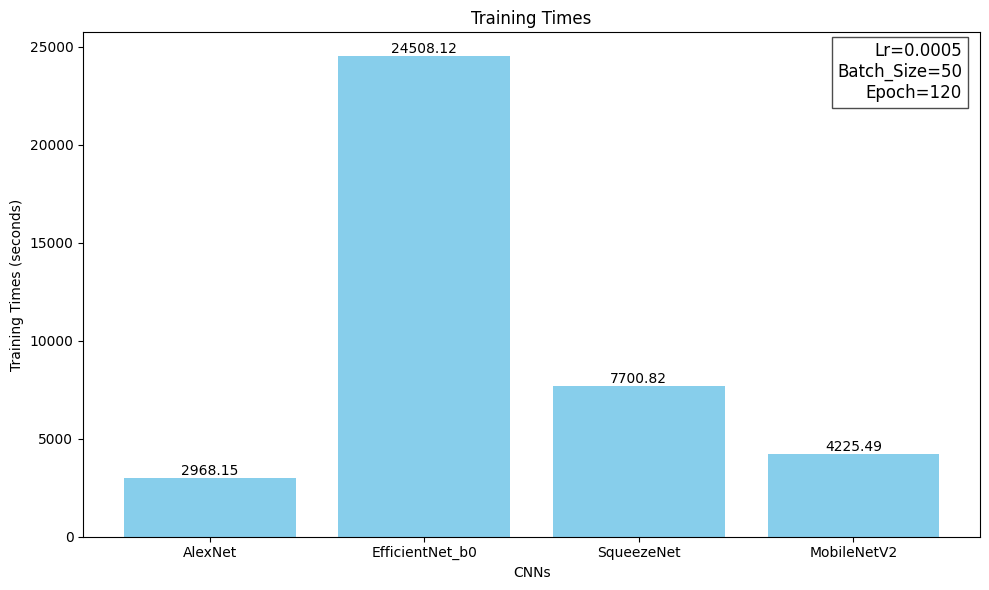

In [21]:
import matplotlib.pyplot as plt

# Values
tiempos = [alexnet_training_time, efficientnetb0_training_time, squeezenet_training_time, movilnetv2_training_time]
redes_names = ["AlexNet", "EfficientNet_b0", "SqueezeNet", "MobileNetV2"]

# Create the bar chart
plt.figure(figsize=(10, 6))
bars = plt.bar(redes_names, tiempos, color='skyblue')

# Add title and labels
plt.title("Training Times")
plt.xlabel('CNNs')
plt.ylabel('Training Times (seconds)')

# Add values on top of each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), 
             ha='center', va='bottom', fontsize=10, color='black')

# Add annotation box
leyenda_texto = "Lr=0.0005\nBatch_Size=50\nEpoch=120"
plt.text(0.98, 0.98, leyenda_texto, ha='right', va='top', fontsize=12, 
         bbox=dict(facecolor='white', alpha=0.7, edgecolor='black'),
         transform=plt.gca().transAxes)  # Use axes coordinates

# Show the plot
plt.tight_layout()  # Ensure the layout looks good
plt.show()


In [22]:
import pandas as pd

# Assuming you have the validation metrics results for each model
squeezenet_val_metrics = {
    "Accuracy": accuracy_val_squeezenet,
    "Precision": precision_val_squeezenet,
    "Recall": recall_val_squeezenet,
    "F1-score": f1_val_squeezenet
}

alexnet_val_metrics = {
    "Accuracy": accuracy_val_alexnet,
    "Precision": precision_val_alexnet,
    "Recall": recall_val_alexnet,
    "F1-score": f1_val_alexnet
}

efficientnet_b0_val_metrics = {
    "Accuracy": accuracy_val_efficientnet_b0,
    "Precision": precision_val_efficientnet_b0,
    "Recall": recall_val_efficientnet_b0,
    "F1-score": f1_val_efficientnet_b0
}

mobilenetv2_val_metrics = {
    "Accuracy": accuracy_val_mobilenetv2,
    "Precision": precision_val_mobilenetv2,
    "Recall": recall_val_mobilenetv2,
    "F1-score": f1_val_mobilenetv2
}

# Training times
tiempos = [
    alexnet_training_time,
    efficientnetb0_training_time,
    squeezenet_training_time,
    movilnetv2_training_time
]

# Create the DataFrame
results_df = pd.DataFrame({
    'Model': ["AlexNet", "EfficientNet_b0", "SqueezeNet", "MobileNetV2"],
    'Training Time (s)': tiempos,
    'Accuracy': [
        alexnet_val_metrics["Accuracy"],
        efficientnet_b0_val_metrics["Accuracy"],
        squeezenet_val_metrics["Accuracy"],
        mobilenetv2_val_metrics["Accuracy"]
    ],
    'Precision': [
        alexnet_val_metrics["Precision"],
        efficientnet_b0_val_metrics["Precision"],
        squeezenet_val_metrics["Precision"],
        mobilenetv2_val_metrics["Precision"]
    ],
    'Recall': [
        alexnet_val_metrics["Recall"],
        efficientnet_b0_val_metrics["Recall"],
        squeezenet_val_metrics["Recall"],
        mobilenetv2_val_metrics["Recall"]
    ],
    'F1-score': [
        alexnet_val_metrics["F1-score"],
        efficientnet_b0_val_metrics["F1-score"],
        squeezenet_val_metrics["F1-score"],
        mobilenetv2_val_metrics["F1-score"]
    ]
})

# Display the DataFrame
print(results_df)


             Model  Training Time (s)  Accuracy  Precision    Recall  F1-score
0          AlexNet        2968.145626  0.842266   0.744227  0.842266  0.787510
1  EfficientNet_b0       24508.121202  1.000000   1.000000  1.000000  1.000000
2       SqueezeNet        7700.822515  0.987749   0.987959  0.987749  0.987677
3      MobileNetV2        4225.487177  1.000000   1.000000  1.000000  1.000000
